In [2]:
# Weight Decay 权重衰减

In [3]:
# 控制模型容量
# 限制参数范围或者数量
# 通常不限制偏移b
# 平方范数作为柔性限制
# 限制参数范围的方法
# 自己大小权重先缩小 权重衰退 再减学习率*梯度

In [4]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [5]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


In [6]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]


In [7]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2
# L2平方范数


In [8]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            #with torch.enable_grad():
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())


w的L2范数是： 12.836345672607422


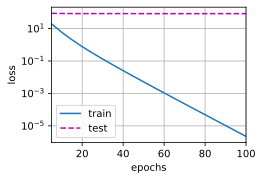

In [9]:
train(lambd=0)

w的L2范数是： 0.35798516869544983


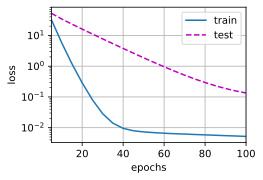

In [10]:
train(lambd=3)

w的L2范数是： 0.023690855130553246


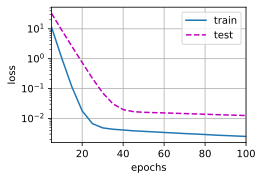

In [11]:
train(lambd=10)

w的L2范数是： 0.0034545438829809427


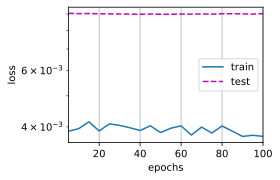

In [12]:
train(lambd=100)

w的L2范数是： 0.010788025334477425


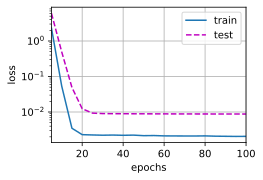

In [13]:
train(lambd=20)

In [16]:
M=torch.tensor([3,45,6,7],dtype=torch.float32)

In [17]:
M.data.normal_()

tensor([-0.9556, -0.4799,  0.8372, -1.0597])

In [18]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())


w的L2范数： 13.237489700317383


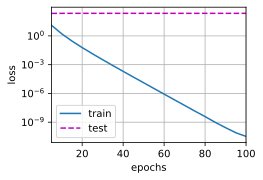

In [19]:
train_concise(0)

w的L2范数： 0.3710668385028839


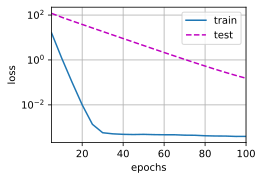

In [20]:
train_concise(3)

w的L2范数： 0.11254686117172241


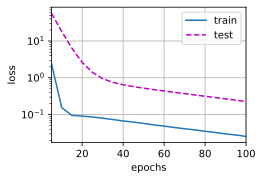

In [21]:
train_concise(10)

w的L2范数： 0.0159549992531538


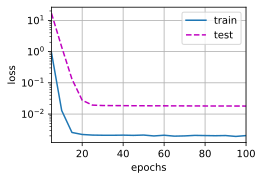

In [22]:
train_concise(20)

w的L2范数： 0.010274522006511688


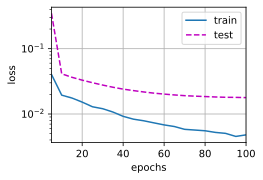

In [23]:
train_concise(50)


In [ ]:
# 常用的lamda 取值 0.001
# 限制参数范围 限制解空间 平滑的曲线
# 限制不平滑的曲线

In [24]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [25]:
def trainL1(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            #with torch.enable_grad():
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L1范数是：', torch.norm(w).item())


w的L1范数是： 12.669499397277832


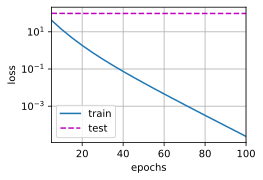

In [26]:
trainL1(0)

w的L1范数是： 4.053657054901123


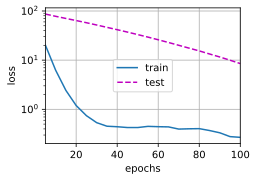

In [27]:
trainL1(1)

w的L1范数是： 0.1210102066397667


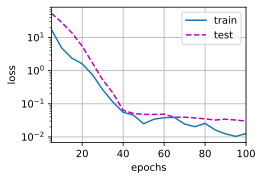

In [28]:
trainL1(5)

w的L1范数是： 0.4337836503982544


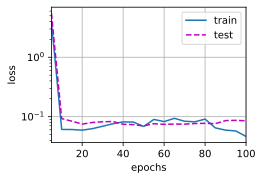

In [29]:
trainL1(20)

w的L1范数是： 0.2494603544473648


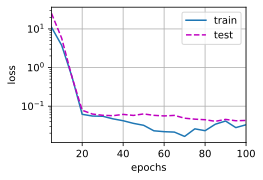

In [30]:
trainL1(10)

w的L1范数是： 1.2444742918014526


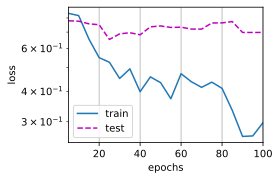

In [31]:
trainL1(50)

In [ ]:
# Weight Delay 选择一般 rate=10e-2,10e-3,10e-4
# 效果一般(如果模型过于复杂)
# 算法尝试记住噪音 lamda试图拉回 需要合适的lamda
# 惩罚项 辅药